# Kaggle Data Visualization
- Make great data visualizations. A great way to see the power of coding!

## Exercise: Scatter Plots

### Step 0: Import libraries and read zipfile & dataset content

In [3]:
import zipfile as zfm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

zipfile = 'DataToVisualize.zip'
dataset = 'candy.csv'

# dir(zfm.ZipFile)
with zfm.ZipFile(zipfile) as zf:
    # datasets = zf.infolist()
    datasets = zf.namelist()
    # datasets = zf.getinfo(name='fifa.csv')
    if dataset in zf.namelist():
        print(f'Dataset "{dataset}" founded in "{zipfile}"')
        # to see first dataset lines (first lines -cols- to found possible index)
        numln = 1
        for ln in zf.open(dataset):
            print(ln)
            if numln == 4: break
            numln += 1

Dataset "candy.csv" founded in "DataToVisualize.zip"
b'id,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent\n'
b'0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.73199999,0.86000001,66.971725\n'
b'1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.60399997,0.51099998,67.602936\n'
b'2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.90600002,0.51099998,52.341465\n'


### Step 1: Load and review the data
- into a pandas DataFrame (df)
- we'll use museum_visitors.csv dataset

In [6]:
with zfm.ZipFile(zipfile) as zf:
    df = pd.read_csv(zf.open(dataset), index_col='id')
print(df.shape)
df.iloc[[0, 5, 9, -9, -5, -1]]

(83, 13)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
5,Boston Baked Beans,No,No,No,Yes,No,No,No,No,Yes,0.313,0.511,23.417824
9,Chewey Lemonhead Fruit Mix,No,Yes,No,No,No,No,No,No,Yes,0.732,0.511,36.017628
74,Tootsie Roll Midgies,Yes,No,No,No,No,No,No,No,Yes,0.174,0.011,45.736748
78,Twizzlers,No,Yes,No,No,No,No,No,No,No,0.220,0.116,45.466282
82,Whoppers,Yes,No,No,No,No,Yes,No,No,Yes,0.872,0.848,49.524113


The dataset contains 83 rows, where each corresponds to a different candy bar. There are 13 columns:

    'competitorname' contains the name of the candy bar.
    the next 9 columns (from 'chocolate' to 'pluribus') describe the candy. For instance, rows with chocolate candies have "Yes" in the 'chocolate' column (and candies without chocolate have "No" in the same column).
    'sugarpercent' provides some indication of the amount of sugar, where higher values signify higher sugar content.
    'pricepercent' shows the price per unit, relative to the other candies in the dataset.
    'winpercent' is calculated from the survey results; higher values indicate that the candy was more popular with survey respondents.

Use the first five rows of the data to answer the questions below.

In [ ]:
# Fill in the line below: Which candy was more popular with survey respondents:
# '3 Musketeers' or 'Almond Joy'?  (Please enclose your answer in single quotes.)
more_popular = ____

# Fill in the line below: Which candy has higher sugar content: 'Air Heads'
# or 'Baby Ruth'? (Please enclose your answer in single quotes.)
more_sugar = ____

### JM mk some previus 'querys' to found the answers. ... 

In [19]:
df.winpercent.max()

84.18029

In [21]:
df.loc[df.winpercent == df.winpercent.max()]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
50,Reese's Peanut Butter cup,Yes,No,No,Yes,No,No,No,No,No,0.72,0.651,84.18029


In [23]:
df.competitorname[df.winpercent == df.winpercent.max()].iloc[0]

"Reese's Peanut Butter cup"

In [30]:
df.loc[df.winpercent == df.winpercent.max()].loc[50, 'competitorname']

"Reese's Peanut Butter cup"

In [39]:
df.competitorname

id
0                      100 Grand
1                   3 Musketeers
2                      Air Heads
3                     Almond Joy
4                      Baby Ruth
                 ...            
78                     Twizzlers
79                      Warheads
80          Welch's Fruit Snacks
81    Werther's Original Caramel
82                      Whoppers
Name: competitorname, Length: 83, dtype: object

In [53]:
### def a function to found the bigger of two candys (row) in one item (col)
def bigger (c1, c2, it):
    if (df.loc[df.competitorname == c1][it].iloc[0] >
        df.loc[df.competitorname == c2][it].iloc[0]):
        return c1
    else:
        return c2
    
### def funct to show values of the candys df
def prt_val (c, it):
    print(c, it, ' -> ', df.loc[df.competitorname == c][it].iloc[0] )


In [55]:
# more popular with survey respondents:
prt_val('3 Musketeers', 'winpercent')
prt_val('Almond Joy', 'winpercent')

3 Musketeers winpercent  ->  67.602936
Almond Joy winpercent  ->  50.347546


In [52]:
more_popular = bigger('3 Musketeers','Almond Joy', 'winpercent')
more_popular

'3 Musketeers'

In [56]:
prt_val('Air Heads', 'sugarpercent')
prt_val('Baby Ruth', 'sugarpercent')

Air Heads sugarpercent  ->  0.90600002
Baby Ruth sugarpercent  ->  0.60399997


In [57]:
more_sugar = bigger('Air Heads', 'Baby Ruth', 'sugarpercent')
more_sugar

'Air Heads'

In [58]:
# Fill in the line below: Which candy was more popular with survey respondents:
# '3 Musketeers' or 'Almond Joy'?  (Please enclose your answer in single quotes.)
more_popular = bigger('3 Musketeers','Almond Joy', 'winpercent')

# Fill in the line below: Which candy has higher sugar content: 'Air Heads'
# or 'Baby Ruth'? (Please enclose your answer in single quotes.)
more_sugar = bigger('Air Heads', 'Baby Ruth', 'sugarpercent')

### Step 3: The role of sugar
Do people tend to prefer candies with higher sugar content?

#### Part A
Create a scatter plot that shows the relationship between 'sugarpercent' (on the horizontal x-axis) and 'winpercent' (on the vertical y-axis). Don't add a regression line just yet -- you'll do that in the next step!

<AxesSubplot: xlabel='sugarpercent', ylabel='winpercent'>

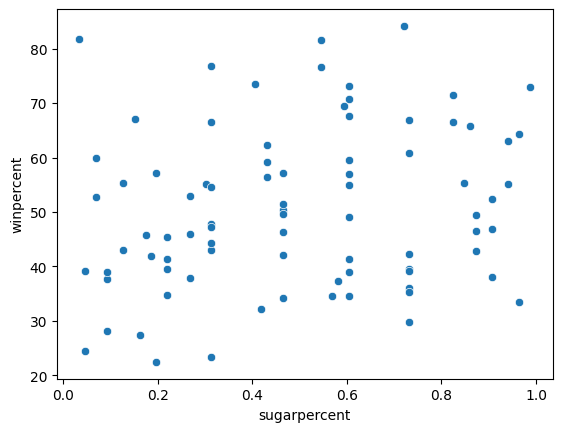

In [60]:
sns.scatterplot(x=df.sugarpercent, y=df.winpercent)

#### Part B

Does the scatter plot show a strong correlation between the two variables? If so, are candies with more sugar relatively more or less popular with the survey respondents?

Hint: Compare candies with higher sugar content (on the right side of the chart) to candies with lower sugar content (on the left side of the chart). Is one group clearly more popular than the other?

Solution: The scatter plot does not show a strong correlation between the two variables. Since there is no clear relationship between the two variables, this tells us that sugar content does not play a strong role in candy popularity.

### Step 4: Take a closer look
#### Part A

Create the same scatter plot you created in Step 3, but now with a regression line!

<AxesSubplot: xlabel='sugarpercent', ylabel='winpercent'>

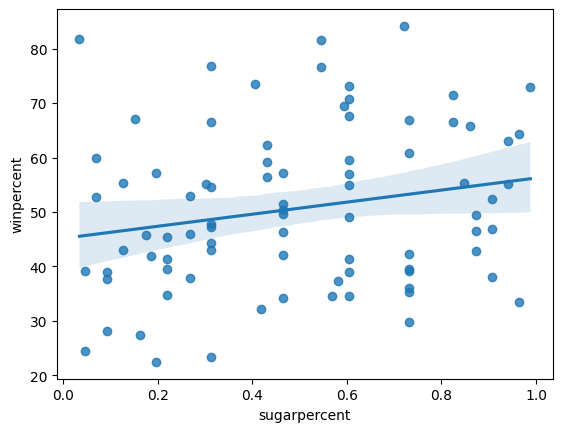

In [62]:
sns.regplot(x=df.sugarpercent, y=df.winpercent)

#### Part B
According to the plot above, is there a slight correlation between 'winpercent' and 'sugarpercent'? What does this tell you about the candy that people tend to prefer?

Hint: Does the regression line have a positive or negative slope?

Solution: Since the regression line has a slightly positive slope, this tells us that there is a slightly positive correlation between 'winpercent' and 'sugarpercent'. Thus, people have a slight preference for candies containing relatively more sugar.

### Step 5: Chocolate!

In the code cell below, create a scatter plot to show the relationship between 'pricepercent' (on the horizontal x-axis) and 'winpercent' (on the vertical y-axis). Use the 'chocolate' column to color-code the points. Don't add any regression lines just yet -- you'll do that in the next step!


<AxesSubplot: xlabel='sugarpercent', ylabel='winpercent'>

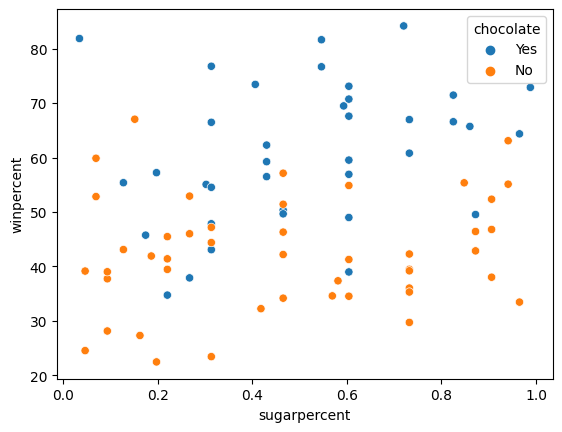

In [63]:
sns.scatterplot(x=df.sugarpercent, y=df.winpercent, hue=df.chocolate)

### Step 6: Investigate chocolate¶
#### Part A

Create the same scatter plot you created in Step 5, but now with two regression lines, corresponding to (1) chocolate candies and (2) candies without chocolate.

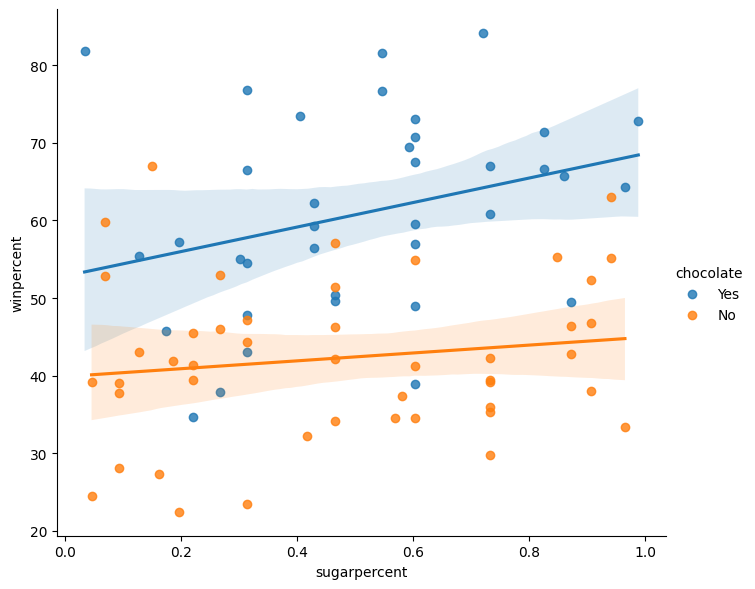

In [64]:
sns.lmplot(x="sugarpercent", y="winpercent", hue="chocolate", data=df, height=6, aspect=16/14)

#### Part B

Using the regression lines, what conclusions can you draw about the effects of chocolate and price on candy popularity?

Hint: Look at each regression line - do you notice a positive or negative slope?

Solution: We'll begin with the regression line for chocolate candies. Since this line has a slightly positive slope, we can say that more expensive chocolate candies tend to be more popular (than relatively cheaper chocolate candies). Likewise, since the regression line for candies without chocolate has a negative slope, we can say that if candies don't contain chocolate, they tend to be more popular when they are cheaper. One important note, however, is that the dataset is quite small -- so we shouldn't invest too much trust in these patterns! To inspire more confidence in the results, we should add more candies to the dataset.


### Step 7: Everybody loves chocolate.
#### Part A

Create a categorical scatter plot to highlight the relationship between 'chocolate' and 'winpercent'. Put 'chocolate' on the (horizontal) x-axis, and 'winpercent' on the (vertical) y-axis.

<AxesSubplot: xlabel='chocolate', ylabel='winpercent'>

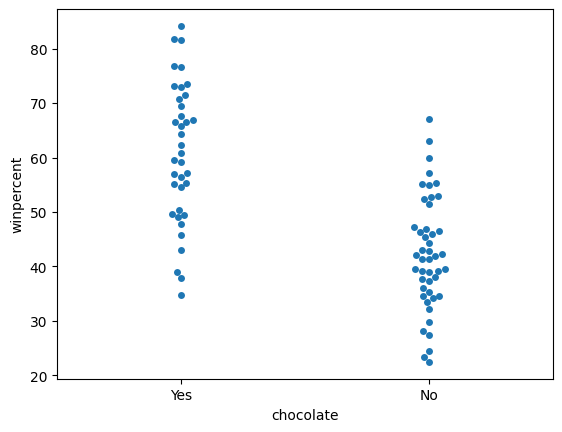

In [66]:
sns.swarmplot(x=df.chocolate, y=df.winpercent)

#### Part B

You decide to dedicate a section of your rep
ort to the fact that chocolate candies tend to be more popular than candies without chocolate. Which plot is more appropriate to tell this story: the plot from Step 6, or the plot from Step 7?

Hint: Which plot communicates more information? In general, it's good practice to use the simplest plot that tells the entire story of interest.

Solution: In this case, the categorical scatter plot from Step 7 is the more appropriate plot. While both plots tell the desired story, the plot from Step 6 conveys far more information that could distract from the main point.
